### Binary Image Classification Model

Built a binary image classifier model for dog/cat images using Transfer Learning. The InceptionV3 model (trained on ImageNet) was used as the pre-trained network and the model was fine tuned for the desired cat/dog dataset. The accuracy of the model was 92%

In [13]:
from __future__ import print_function
import keras
from keras.models import Sequential, Model 
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import applications
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import backend as K

import matplotlib.pyplot
%matplotlib inline  

### Load and Process Data

Load the images and rescale and resize images

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [15]:
img_width, img_height = 150, 150

train_data_dir = '/home/ubuntu/pynb/datascience/dogsvscats/data/train'
validation_data_dir = '/home/ubuntu/pynb/datascience/dogsvscats/data/validation'
nb_train_samples = 2000
nb_validation_samples = 2000
epochs = 40
batch_size = 16

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.


In [17]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [6]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5000 images belonging to 2 classes.


In [18]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Model Definition

Download the pre-trained InceptionV3 network and freeze the first 283 layers.

Add additional layers to fine tune the model

In [19]:
model = applications.InceptionV3(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

In [33]:
freezelayers = 283

310

In [21]:
for layer in model.layers[:freezelayers]:
    layer.trainable = False

In [22]:
x = model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid")(x)

In [12]:
model_final = Model(input = model.input, output = predictions)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  if __name__ == '__main__':


In [23]:
# compile the model 
model_final.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
# Save the model according to the conditions  
checkpoint = ModelCheckpoint("InceptionV3.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

### Model Training

In [25]:
history = model_final.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    verbose=1, callbacks = [checkpoint, early])

Epoch 1/40
125/125 [==============================] - 90s - loss: 2.7835 - acc: 0.7145 - val_loss: 7.5145 - val_acc: 0.5250
Epoch 2/40
125/125 [==============================] - 30s - loss: 1.1014 - acc: 0.8170 - val_loss: 1.1567 - val_acc: 0.8755
Epoch 3/40
125/125 [==============================] - 29s - loss: 0.7724 - acc: 0.8345 - val_loss: 0.8551 - val_acc: 0.8845
Epoch 4/40
125/125 [==============================] - 24s - loss: 0.5495 - acc: 0.8445 - val_loss: 1.8256 - val_acc: 0.7790
Epoch 5/40
125/125 [==============================] - 24s - loss: 0.5349 - acc: 0.8605 - val_loss: 0.8854 - val_acc: 0.8820
Epoch 6/40
125/125 [==============================] - 24s - loss: 0.4266 - acc: 0.8725 - val_loss: 0.7875 - val_acc: 0.8815
Epoch 7/40
125/125 [==============================] - 25s - loss: 0.4912 - acc: 0.8555 - val_loss: 1.0824 - val_acc: 0.8605
Epoch 8/40
125/125 [==============================] - 25s - loss: 0.4835 - acc: 0.8635 - val_loss: 1.0573 - val_acc: 0.8630
Epoch 9/

125/125 [==============================] - 31s - loss: 0.3033 - acc: 0.9030 - val_loss: 0.3864 - val_acc: 0.9157
Epoch 34/40
125/125 [==============================] - 25s - loss: 0.2668 - acc: 0.9115 - val_loss: 0.5939 - val_acc: 0.8960
Epoch 35/40
125/125 [==============================] - 24s - loss: 0.2273 - acc: 0.9235 - val_loss: 0.4036 - val_acc: 0.9116
Epoch 36/40
125/125 [==============================] - 24s - loss: 0.2722 - acc: 0.9185 - val_loss: 0.4006 - val_acc: 0.9065
Epoch 37/40
125/125 [==============================] - 24s - loss: 0.2714 - acc: 0.9135 - val_loss: 0.4410 - val_acc: 0.9070
Epoch 38/40
125/125 [==============================] - 24s - loss: 0.2656 - acc: 0.9175 - val_loss: 0.4362 - val_acc: 0.9096
Epoch 39/40
125/125 [==============================] - 31s - loss: 0.3021 - acc: 0.9005 - val_loss: 0.3692 - val_acc: 0.9170
Epoch 40/40
125/125 [==============================] - 24s - loss: 0.2500 - acc: 0.9165 - val_loss: 0.4081 - val_acc: 0.9157


### Visualizing of Bias-Variance Trade-off

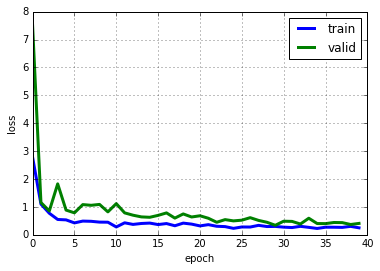

In [27]:
%matplotlib inline

from matplotlib import pyplot

pyplot.plot(history.history['loss'], linewidth=3, label="train")
pyplot.plot(history.history['val_loss'], linewidth=3, label="valid")
pyplot.grid()
pyplot.legend()
pyplot.xlabel("epoch")
pyplot.ylabel("loss")
#pyplot.ylim(1e-3, 1e-1)
#pyplot.yscale("log")
pyplot.show()